In [3]:
 %matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

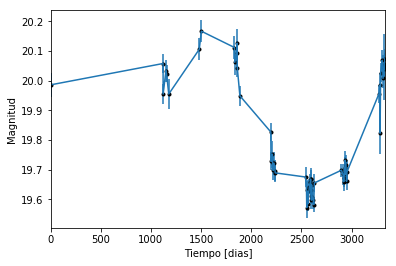

In [4]:
data = np.genfromtxt('LC_15195_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [5]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [6]:
%%capture capt
sample = model.run_mcmc(20000)

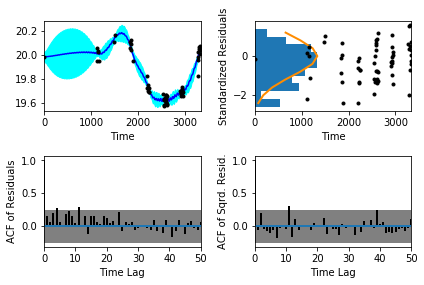

In [7]:
sample.assess_fit()

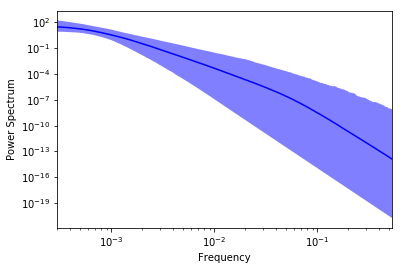

In [8]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [9]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000374595,0.102106,'Medida del nivel de ruido')

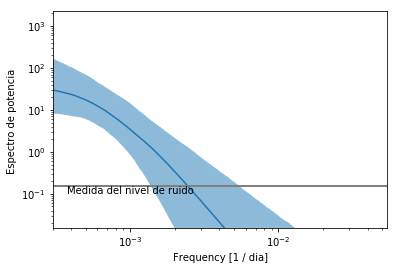

In [10]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

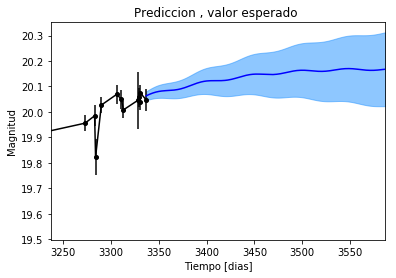

In [11]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

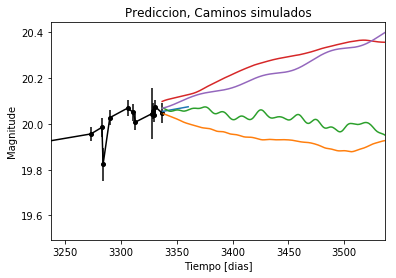

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


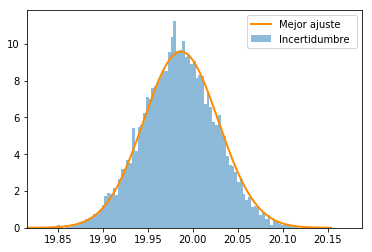

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

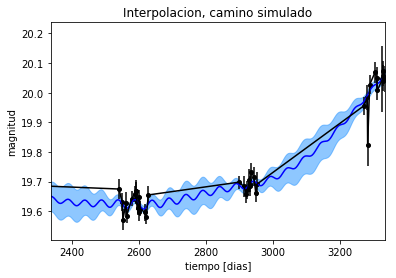

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

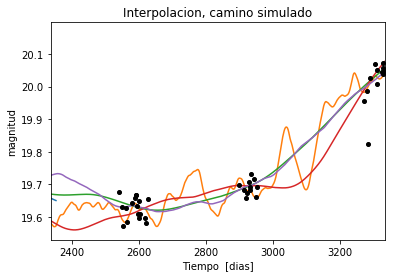

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

Plotting parameter summary


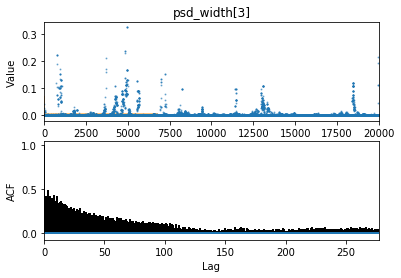

In [17]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [18]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [19]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 760.68224056
Median: 0.00416922580489
Standard deviation: 0.186061726352
68% credibility interval: [ 0.00045692  0.14308467]
95% credibility interval: [  3.13275192e-04   7.53616286e-01]
99% credibility interval: [  3.02058038e-04   9.81557437e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 730.21978612
Median: 0.000724305606637
Standard deviation: 0.047292184594
68% credibility interval: [ 0.00036291  0.00913867]
95% credibility interval: [ 0.00030844  0.10196287]
99% credibility interval: [ 0.00030067  0.29584334]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 933.052983263
Median: 0.00586918382126
Standard deviation:

In [20]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 388.955489103
Median: 0.000475469755027
Standard deviation: 0.207486017135
68% credibility interval: [ 0.          0.16009821]
95% credibility interval: [ 0.          0.82171526]
99% credibility interval: [ 0.          0.99090334]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 388.955489103
Median: 0.000475469755027
Standard deviation: 0.207486017135
68% credibility interval: [ 0.          0.16009821]
95% credibility interval: [ 0.          0.82171526]
99% credibility interval: [ 0.          0.99090334]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2394.11408083
Median: 0.0
Standard deviation: 0.000200257466594
68

Plotting parameter summary


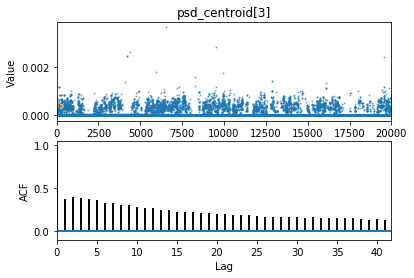

In [22]:
sample.plot_parameter('psd_centroid', 3, doShow=True)

In [23]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [24]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1601.46749491
Median: 126.392899462
Standard deviation: 1.6011865814
68% credibility interval: [ 124.61568722  127.54096446]
95% credibility interval: [ 122.14212401  128.33358004]
99% credibility interval: [ 120.15010972  128.72773933]


In [25]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [26]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 345.375143914
Median: 0.308918621953
Standard deviation: 1.83391727251
68% credibility interval: [ 0.02531182  2.87435341]
95% credibility interval: [ 0.01029491  6.35618892]
99% credibility interval: [ 0.00838933  7.98615803]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 696.374618503
Median: 0.10497679877
Standard deviation: 6.92789463431
68% credibility interval: [ 0.00298182  2.86352749]
95% credibility interval: [  1.31901270e-04

Plotting parameter summary


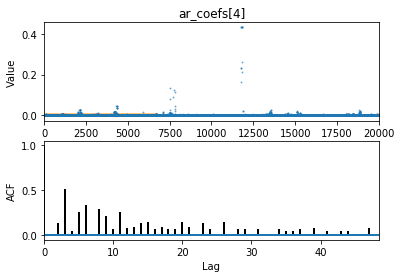

In [27]:
sample.plot_parameter('ar_coefs', 4, doShow=True)

In [28]:
 centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [29]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 489.326467753
Median: 7.18755458552e-41
Standard deviation: 1157644.28877
68% credibility interval: [  1.07916422e-124   2.02231697e-015]
95% credibility interval: [  3.31429887e-196   2.54470488e+000]
99% credibility interval: [  4.34370217e-221   4.72158413e+005]


In [30]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [31]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1225.12356145
Median: 19.9434533503
Standard deviation: 0.143821285039
68% credibility interval: [ 19.83862341  20.07158719]
95% credibility interval: [ 19.69714679  20.26852295]
99% credibility interval: [ 19.55164913  20.44042979]


Plotting parameter summary


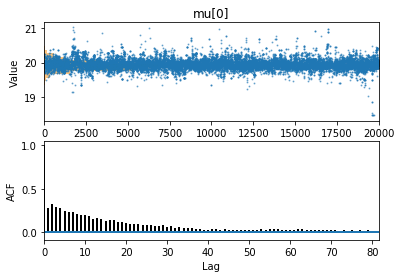

In [32]:
sample.plot_parameter('mu', 0, doShow=True)

In [33]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

Plotting parameter summary


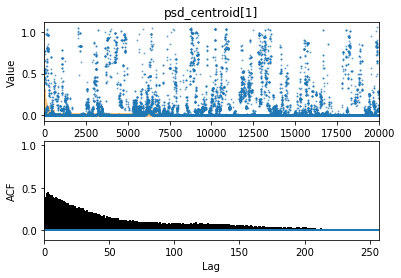

In [34]:
sample.plot_parameter('psd_centroid', 1, doShow=True)

In [35]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [36]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1601.46749491
Median: 126.392899462
Standard deviation: 1.6011865814
68% credibility interval: [ 124.61568722  127.54096446]
95% credibility interval: [ 122.14212401  128.33358004]
99% credibility interval: [ 120.15010972  128.72773933]


Plotting parameter summary


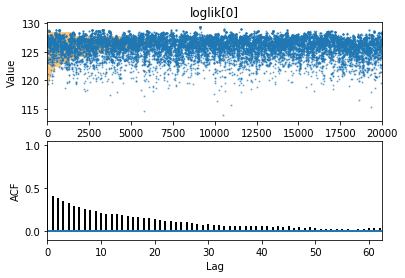

In [37]:
sample.plot_parameter('loglik', 0, doShow=True)

In [38]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [39]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 946.155454144
Median: 0.047514357731
Standard deviation: 0.0697020988277
68% credibility interval: [ 0.02681657  0.10395524]
95% credibility interval: [ 0.01674223  0.2527721 ]
99% credibility interval: [ 0.01277048  0.41437462]


Plotting parameter summary


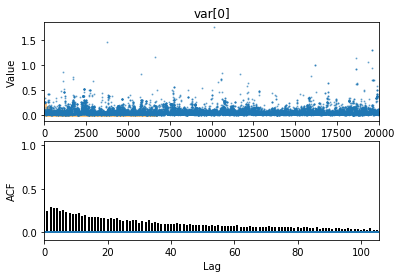

In [40]:
sample.plot_parameter('var', 0, doShow=True)

In [41]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [42]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1430.71819487
Median: 1.08220465956
Standard deviation: 0.169275576131
68% credibility interval: [ 0.93667927  1.26952098]
95% credibility interval: [ 0.8218488   1.47933007]
99% credibility interval: [ 0.74803473  1.61430419]


Plotting parameter summary


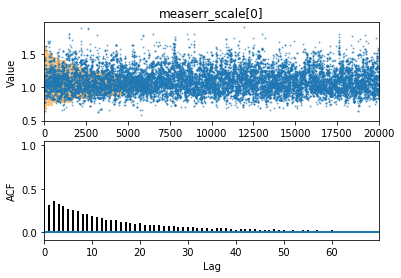

In [43]:
sample.plot_parameter('measerr_scale', 0, doShow=True)

In [44]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [45]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2283.16502593
Median: 1.16711035915e-05
Standard deviation: 0.0321481964308
68% credibility interval: [  1.77344040e-07   4.85132777e-04]
95% credibility interval: [  2.75444944e-09   7.54945941e-03]
99% credibility interval: [  8.05606684e-11   4.23475406e-02]


Plotting parameter summary


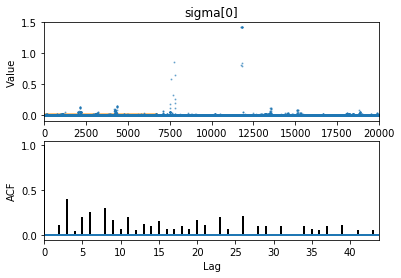

In [46]:
sample.plot_parameter('sigma', 0, doShow=True)

In [47]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [48]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 760.68224056
Median: (-0.0261960183196+0j)
Standard deviation: 1.75107553638
68% credibility interval: [-0.89902751-0.05885386j -0.00287091-0.00192104j]
95% credibility interval: [ -4.73511077e+00+0.j          -1.96836608e-03-0.00107907j]
99% credibility interval: [ -6.16730727e+00+0.j          -1.89788663e-03-0.00401803j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 730.21978612
Median: (-0.00455094634553+0.575330157142j)
Standard deviation: 1.33710845494
68% credibility interval: [-0.05741993+0.45038541j -0.00228021+0.j        ]
95% credibility interval: [-0.64065159 +2.81283416e+00j -0.00193798 +7.26572000e-05j]
99% credibility interval: [-1.85883856 +1.73347315e+00j -0.00188919 +1.22233327e-05j]
Posterior summar